In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [272]:
pip install latex


  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7604 sha256=a5201242709e021d0b8eb0d5ab7d8ff1f0ab873ce26543e6918f9098bafab38d
  Stored in directory: c:\users\soham\appdata\local\pip\cache\wheels\94\84\e5\5ce582523fd479d00356867953085a67c47fbbc86506aa92f8
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7247 sha256=e8c30dd5799282a2613f90ecb766000cbc73b7d0606d5aa519ea7490172ba441
  Stored in directory: c:\users\soham\appdata\local\pip\cache\wheels\8a\0b\a3\37ca07d5a2838bba2e475e8090455e40b94631bd57a99a35f4
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2781 sha256=54e7cc67de2fefe68801104066b820f5b221de49944853250c588d3d4208efc0
  Stored in directory: c:\users\soham\appdata\local\pip\cache\wheels\84\c7\f5\fed66dce1ed897b44e0da776b6a592dfad0a70f7dd61f73a9d
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.whl size=2214 sha256=c99a14141ee9eb353e3ff4f940f9d179d0559c7e203bfc77092d21318b160064
  Stored in 

In [194]:
folder_path = '../Solar'             # .. --> go to parent directory
files = os.listdir(folder_path)[1:-1]

In [195]:
files 

['Plant_1_Generation_Data.csv',
 'Plant_1_Weather_Sensor_Data.csv',
 'Plant_2_Generation_Data.csv',
 'Plant_2_Weather_Sensor_Data.csv']

In [196]:
files_path = ['../Solar' + '/' + i for i in files]

In [197]:
files_path

['../Solar/Plant_1_Generation_Data.csv',
 '../Solar/Plant_1_Weather_Sensor_Data.csv',
 '../Solar/Plant_2_Generation_Data.csv',
 '../Solar/Plant_2_Weather_Sensor_Data.csv']

In [275]:
gen_1  = pd.read_csv('../Solar/Plant_1_Generation_Data.csv')
sens_1  = pd.read_csv('../Solar/Plant_1_Weather_Sensor_Data.csv')

gen_1.drop('PLANT_ID',1,inplace=True)
sens_1.drop('PLANT_ID',1,inplace=True)

gen_1['DATE_TIME']= pd.to_datetime(gen_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
sens_1['DATE_TIME']= pd.to_datetime(sens_1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

In [276]:
gen_1

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [277]:
gen_1[gen_1['SOURCE_KEY'] == '4UPUqMRk7TRMgml'].drop(columns = ['SOURCE_KEY']).reset_index()

,index,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD


In [278]:
sens_1

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...
3177,2020-06-17 22:45:00,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [279]:
grp1 = gen_1.groupby(by = 'DATE_TIME').sum()

Text(0, 0.5, 'Power_Generation_in_KW')

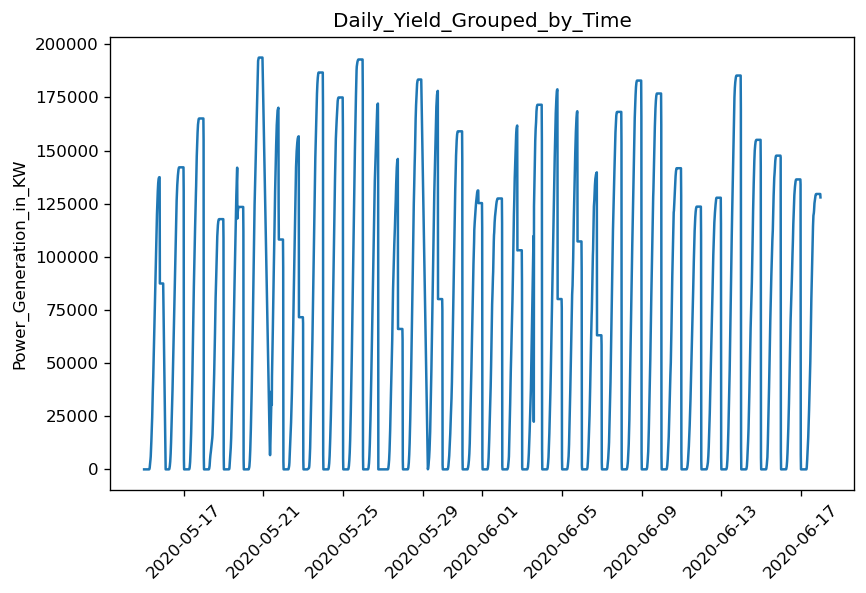

In [280]:
plt.figure(figsize = (8,5))
plt.plot(grp1['DAILY_YIELD'])
plt.xticks(rotation=45)
plt.title('Daily_Yield_Grouped_by_Time')
plt.ylabel('Power_Generation_in_KW')

In [281]:
grp2 = grp1.groupby(by = grp1.index.date).sum()

Text(0, 0.5, 'Power_Generation_in_KW')

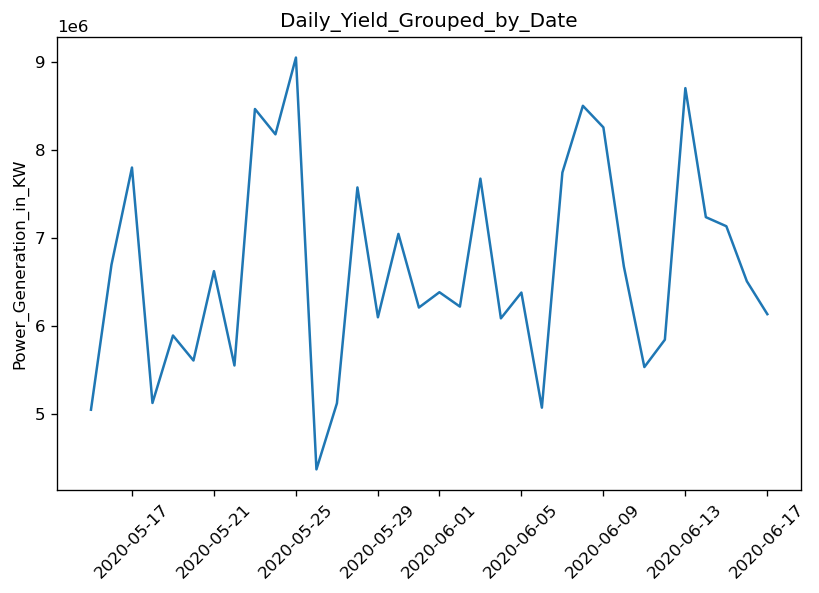

In [282]:
plt.figure(figsize = (8,5))
plt.plot(grp2['DAILY_YIELD'])
plt.xticks(rotation=45)
plt.title('Daily_Yield_Grouped_by_Date')
plt.ylabel('Power_Generation_in_KW')

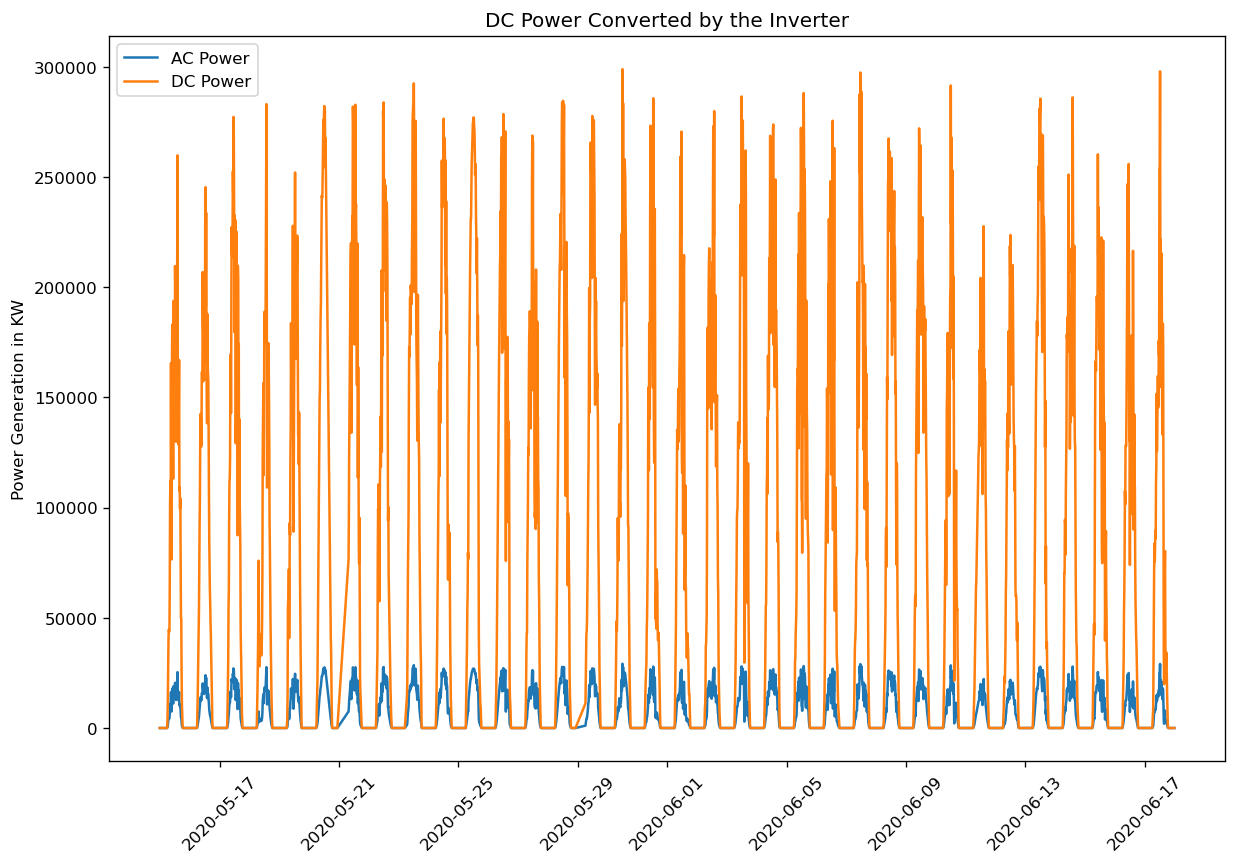

In [283]:
plt.figure(figsize = (12,8))

plt.plot(grp1['AC_POWER'], label = 'AC Power')
plt.plot(grp1['DC_POWER'], label = 'DC Power')

plt.xticks(rotation=45)
plt.title('DC Power Converted by the Inverter')
plt.ylabel('Power Generation in KW')
plt.legend()

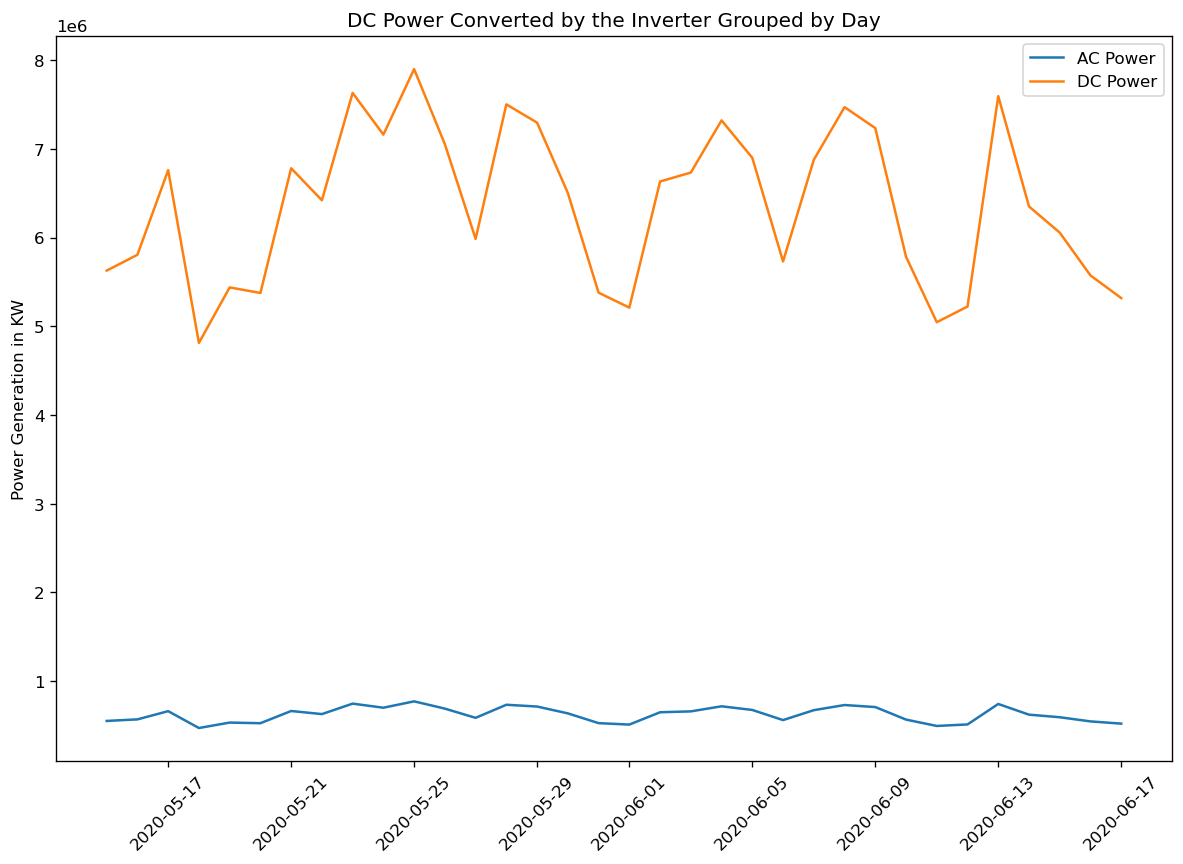

In [284]:
plt.figure(figsize = (12,8))

plt.plot(grp2['AC_POWER'], label = 'AC Power')
plt.plot(grp2['DC_POWER'], label = 'DC Power')

plt.xticks(rotation=45)
plt.title('DC Power Converted by the Inverter Grouped by Day')
plt.ylabel('Power Generation in KW')
plt.legend()

Text(0, 0.5, '% of DC/AC')

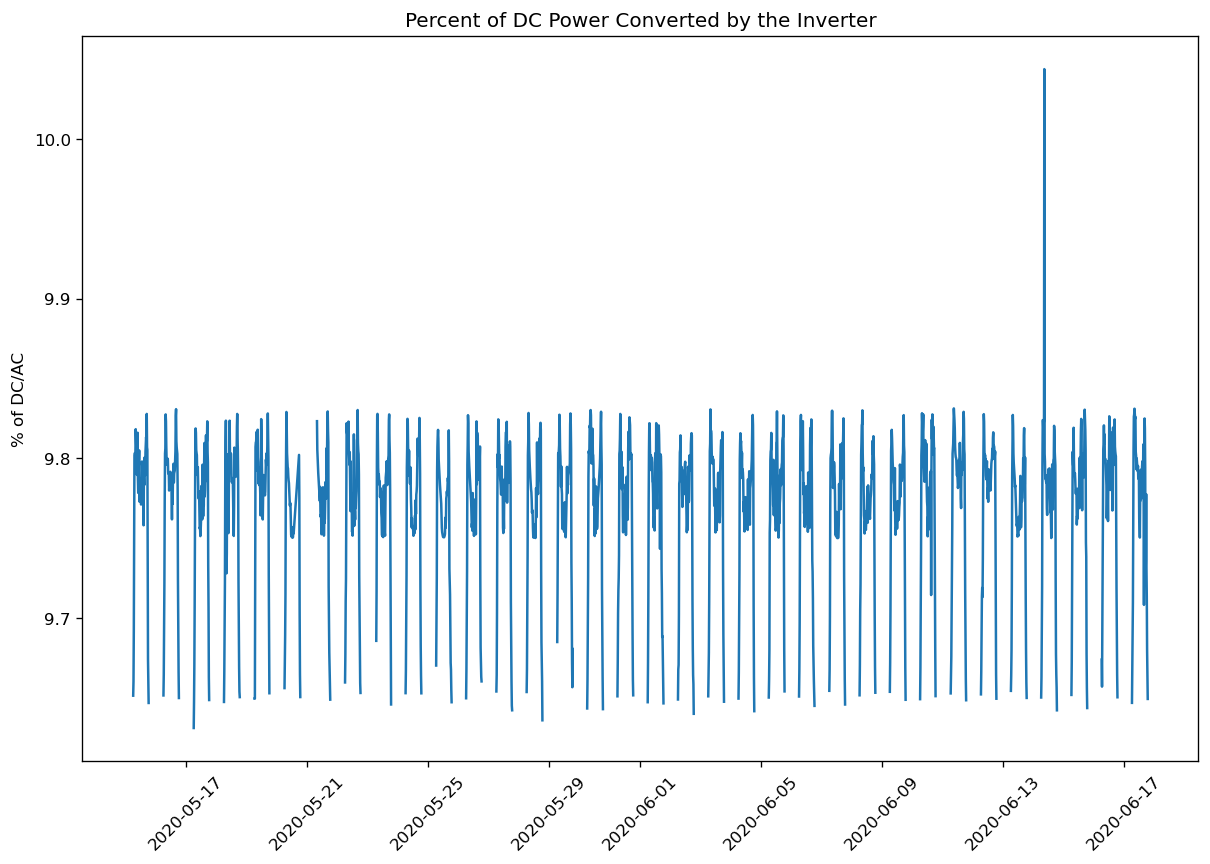

In [285]:
plt.figure(figsize = (12,8))

plt.plot(100*grp1['AC_POWER']/grp1['DC_POWER'])

plt.xticks(rotation=45)
plt.title('Percent of DC Power Converted by the Inverter')
plt.ylabel('% of DC/AC')

Text(0, 0.5, '% of DC/AC')

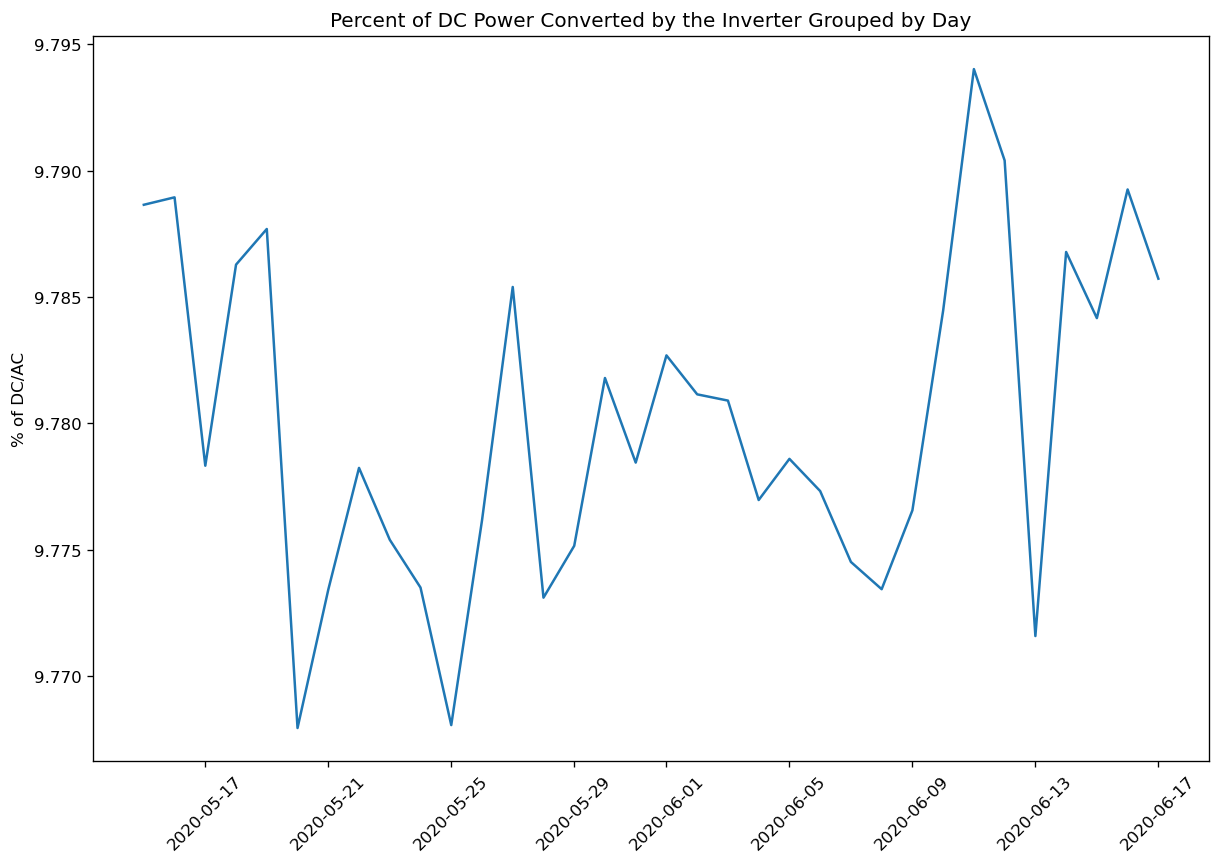

In [286]:
plt.figure(figsize = (12,8))

plt.plot(100*grp2['AC_POWER']/grp2['DC_POWER'])

plt.xticks(rotation=45)
plt.title('Percent of DC Power Converted by the Inverter Grouped by Day')
plt.ylabel('% of DC/AC')

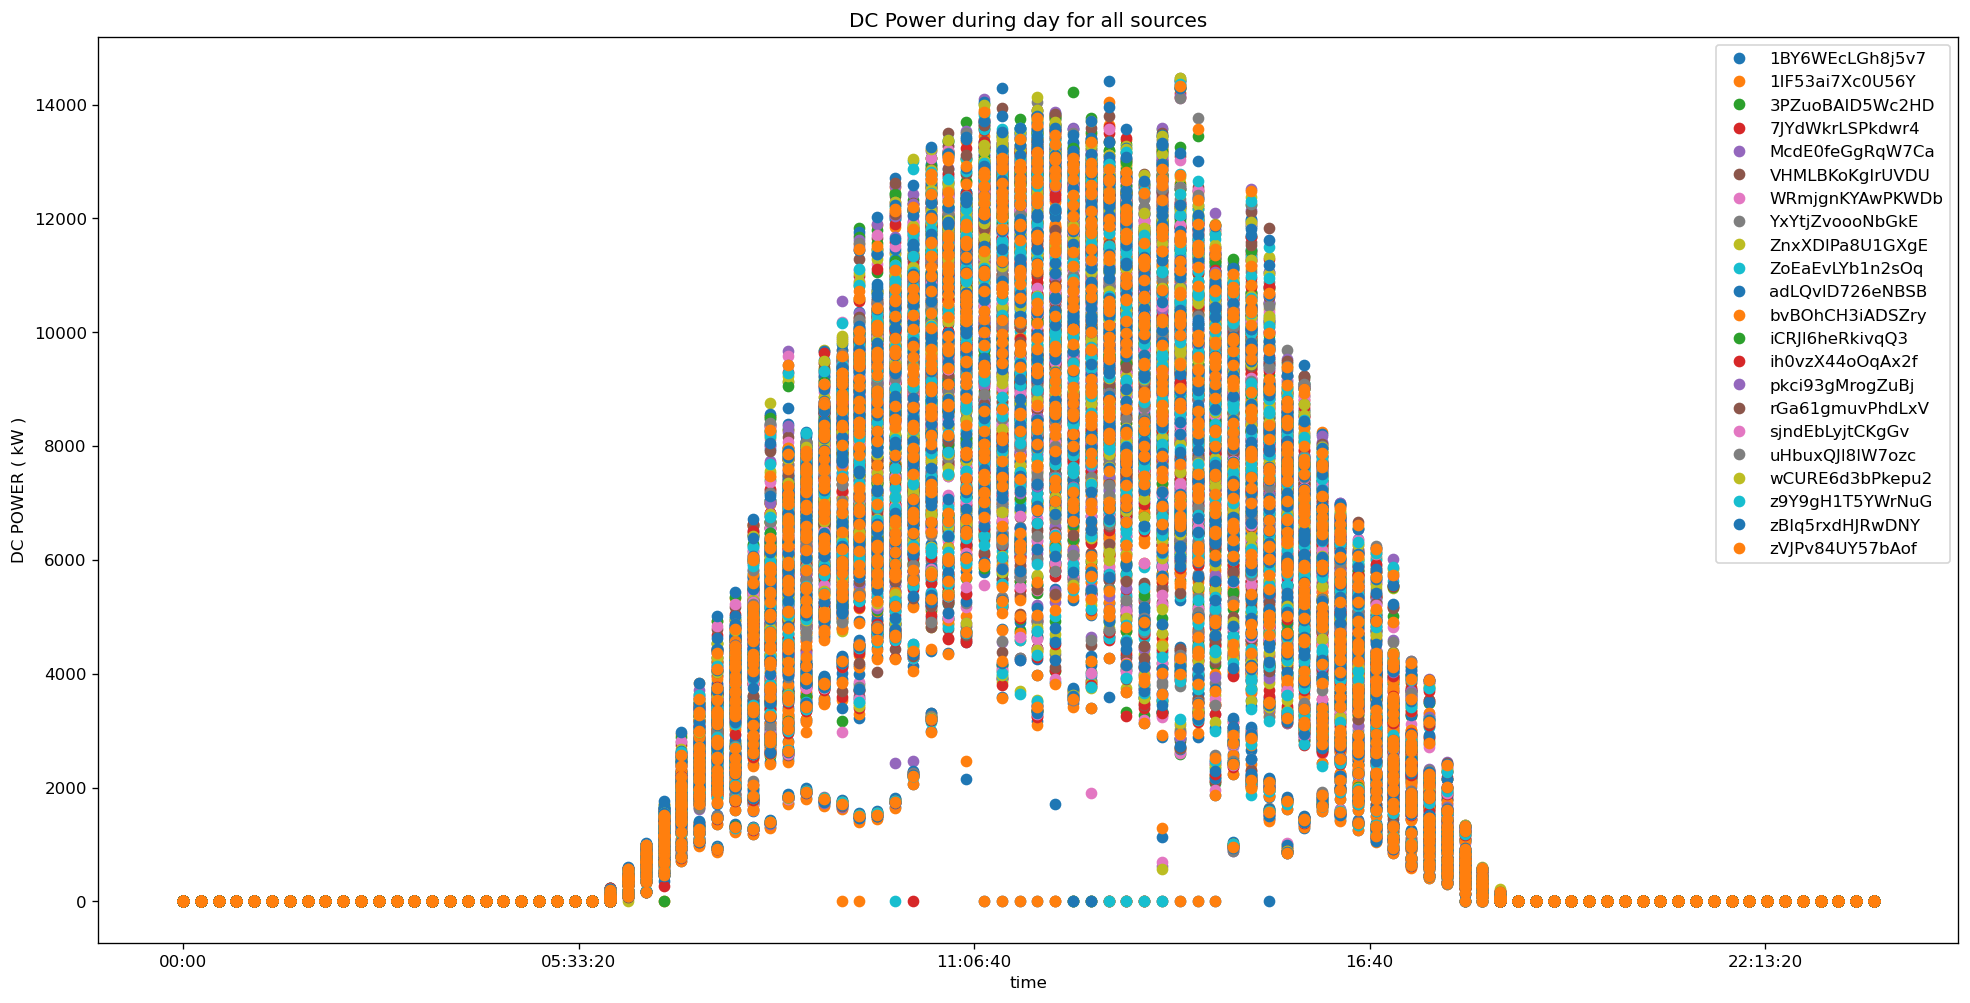

In [287]:
sources=gen_1.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style='o',legend=True,figsize=(20,10))
plt.title('DC Power during day for all sources')
plt.ylabel('DC POWER ( kW )')
plt.show()

Text(0, 0.5, 'Power Genereated in KW')

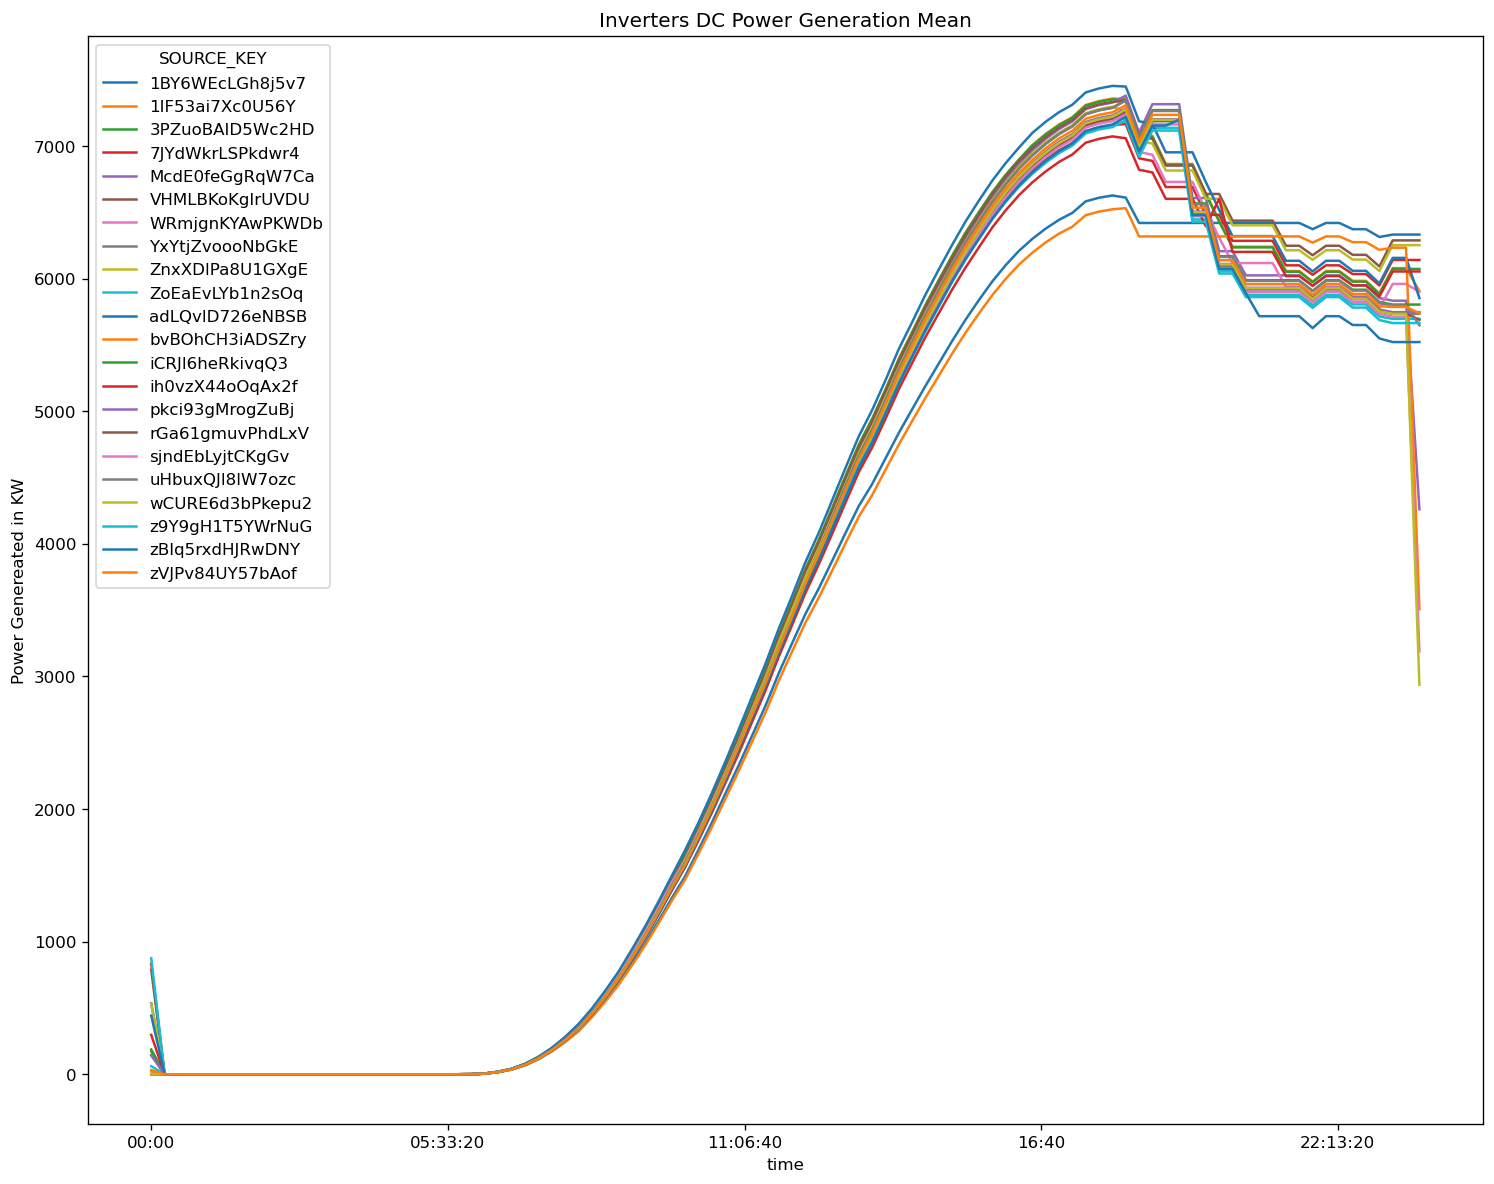

In [288]:
sources=gen_1.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources = sources.set_index('time')
sources = sources.groupby(by = ['time', 'SOURCE_KEY'])['DAILY_YIELD'].mean().unstack()

sources.plot(figsize = (15,12))
plt.title('Inverters DC Power Generation Mean')
plt.ylabel('Power Genereated in KW')

Text(0, 0.5, 'Power Genereated in KW')

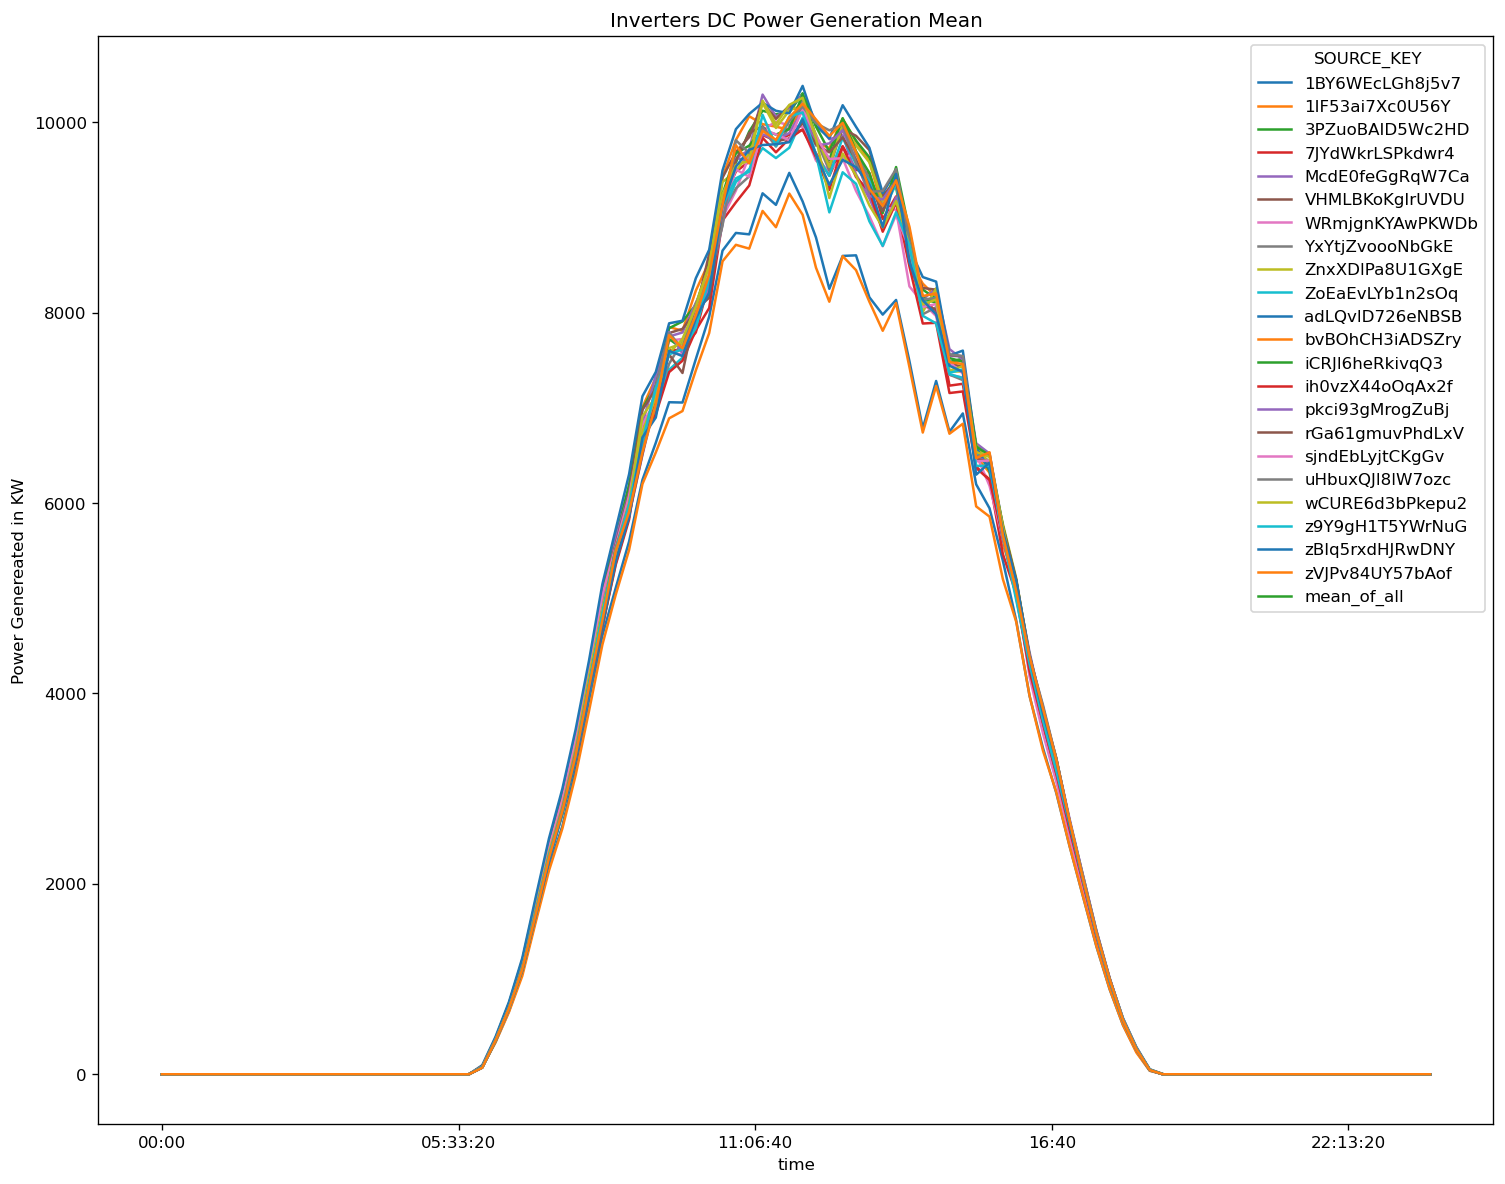

In [289]:
sources=gen_1.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources = sources.set_index('time')
sources = sources.groupby(by = ['time', 'SOURCE_KEY'])['DC_POWER'].mean().unstack()
sources['mean_of_all'] = sources.sum()

sources.plot(figsize = (15,12))
plt.title('Inverters DC Power Generation Mean')
plt.ylabel('Power Genereated in KW')

In [290]:
sources=gen_1.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources = sources.set_index('time')
sources = sources.groupby(by = ['time', 'SOURCE_KEY'])['DC_POWER'].mean().unstack()
sources['mean_of_all'] = sources.sum()

for i in range(len(sources)):
    sources['mean_of_all'].iloc[i] = sources.iloc[i].mean()

In [291]:
smallest= []
for i in range(len(sources)):
    smallest.append(sources.iloc[i].nsmallest(5))

In [292]:
smallest = pd.DataFrame(smallest)

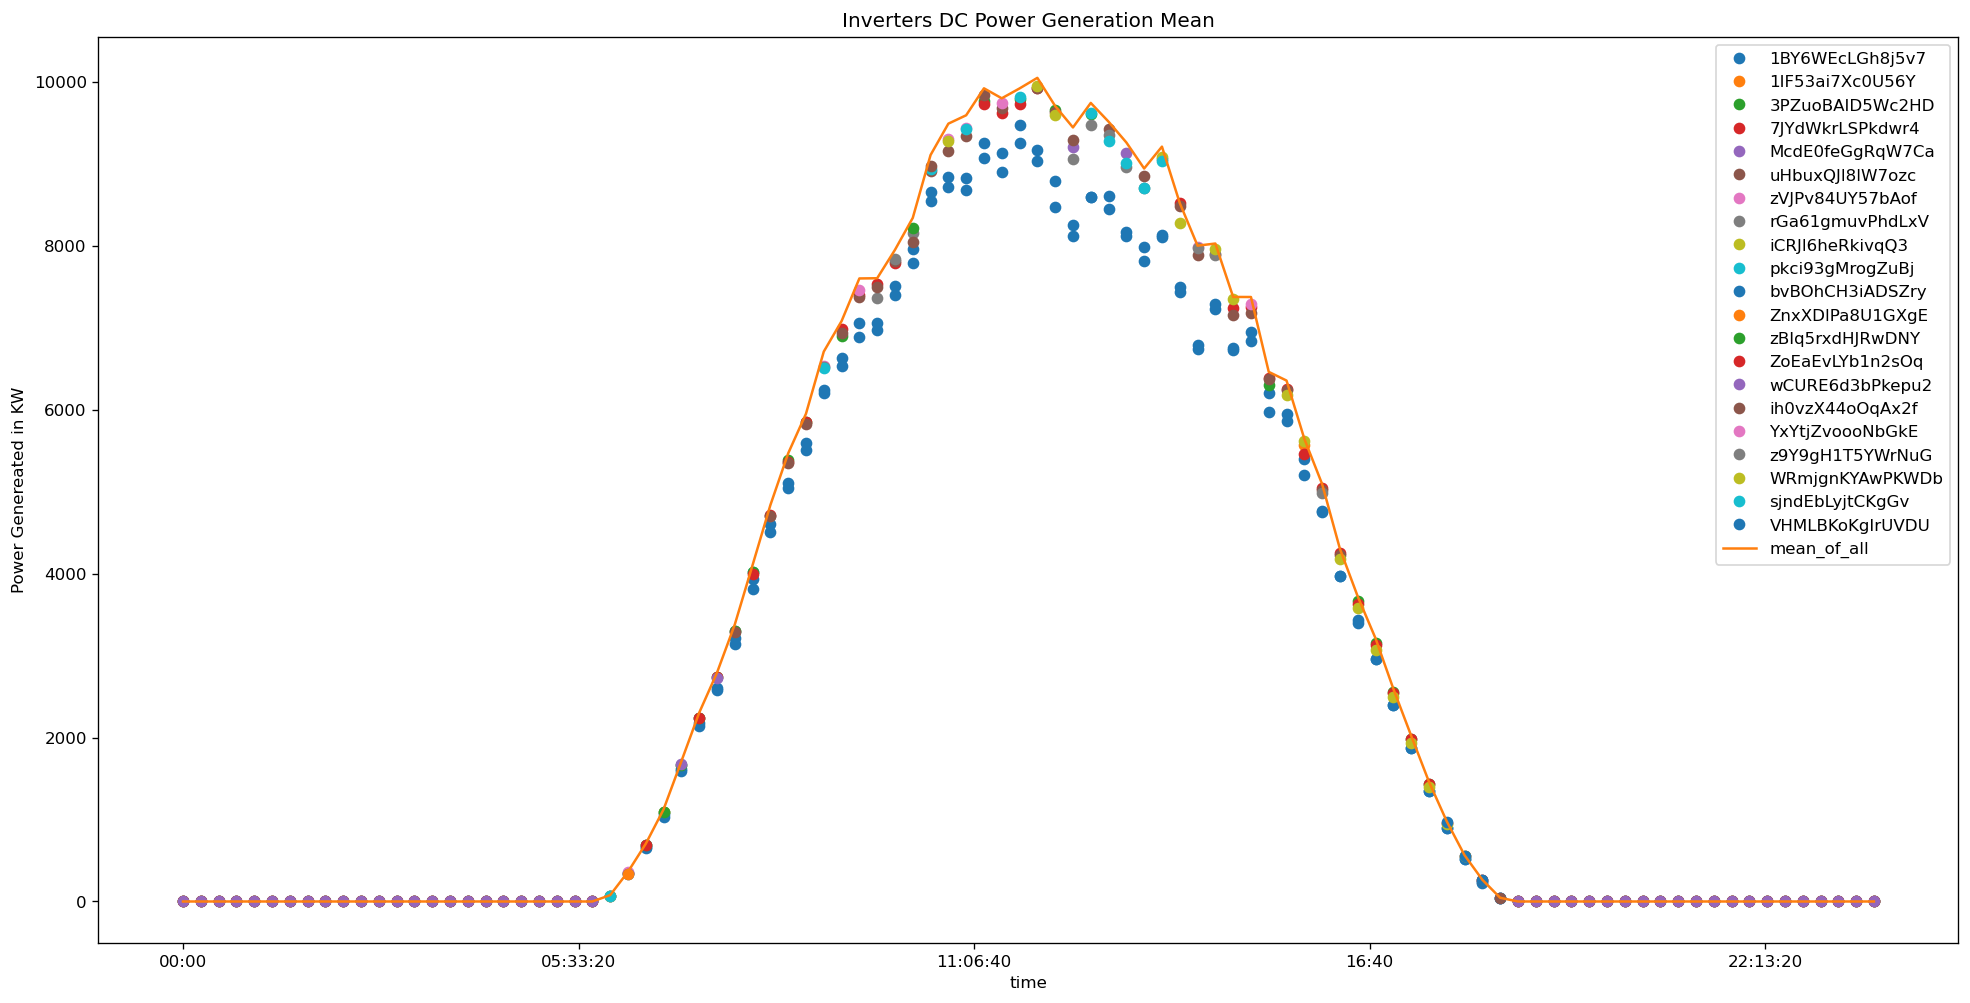

In [293]:
import matplotlib.pyplot as plt

# Plot the 'smallest' series with style 'o'
smallest.plot(style='o', legend=True, figsize=(20, 10))

# Plot the 'mean_of_all' series
sources['mean_of_all'].plot()

# Add labels and legend
plt.title('Inverters DC Power Generation Mean')
plt.ylabel('Power Genereated in KW')
plt.legend()

# Show the plot
plt.show()


In [294]:
sens_1.corr()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
AMBIENT_TEMPERATURE,1.000000,0.853778,0.722999
MODULE_TEMPERATURE,0.853778,1.000000,0.961566
IRRADIATION,0.722999,0.961566,1.000000


Text(0, 0.5, 'Temp in Celsius')

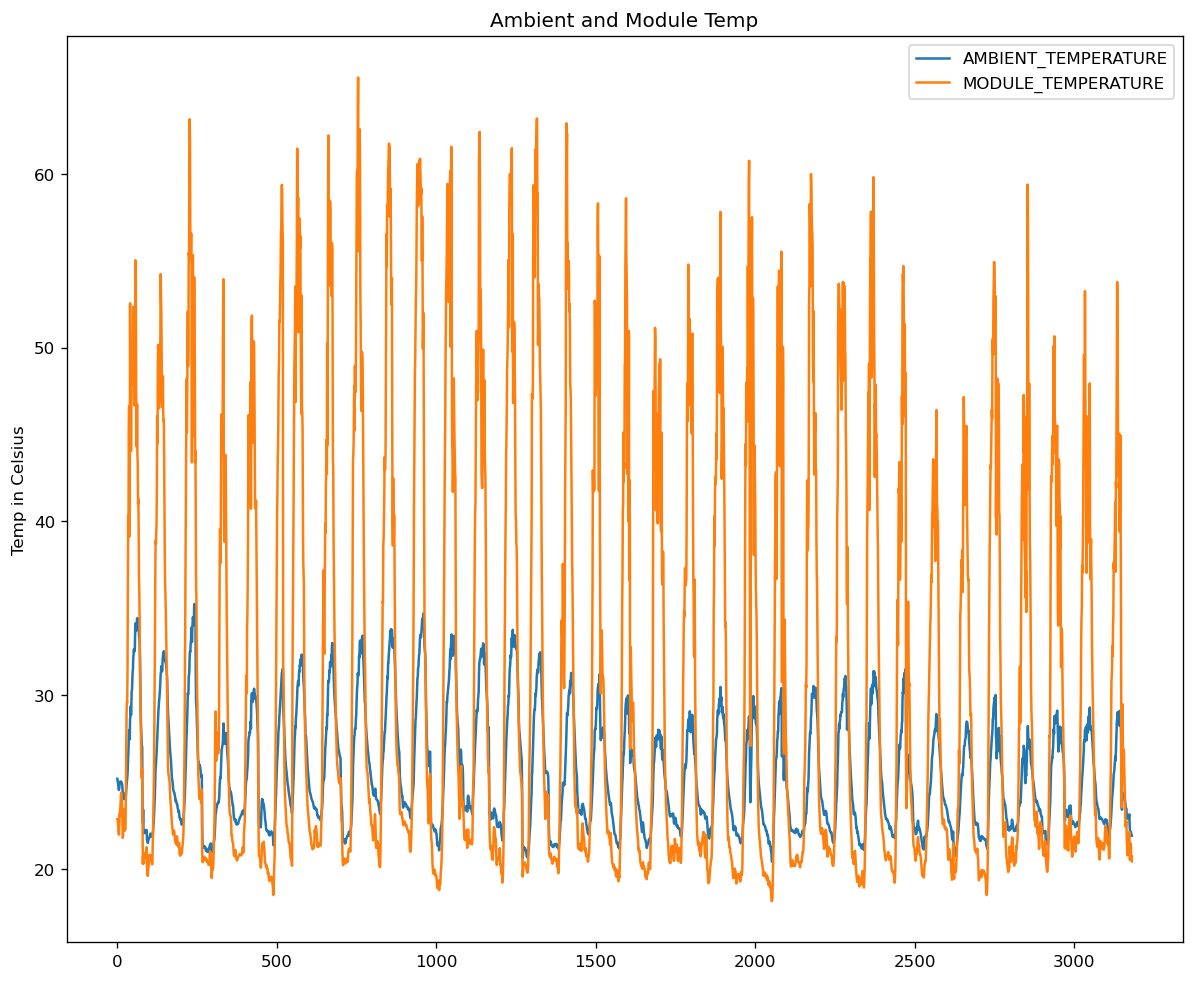

In [295]:
sens_1[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].plot(figsize = (12,10))
plt.title('Ambient and Module Temp')
plt.ylabel('Temp in Celsius')

In [296]:
sens_1['time'] = sens_1['DATE_TIME'].dt.time
grp1_sens_1 = sens_1.groupby(['time']).mean()

Text(0, 0.5, 'Temp in Celsius')

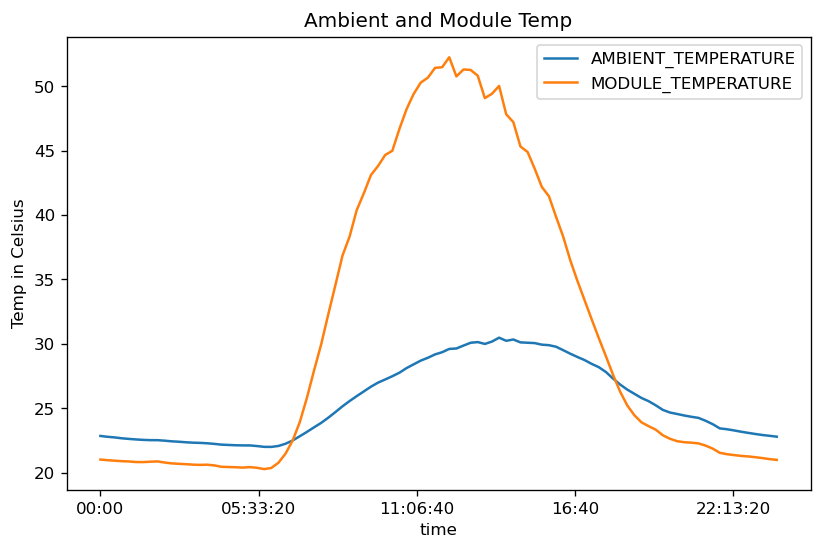

In [297]:
grp1_sens_1[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].plot(figsize = (8,5))
plt.title('Ambient and Module Temp')
plt.ylabel('Temp in Celsius')

Text(0, 0.5, 'Wh/m²')

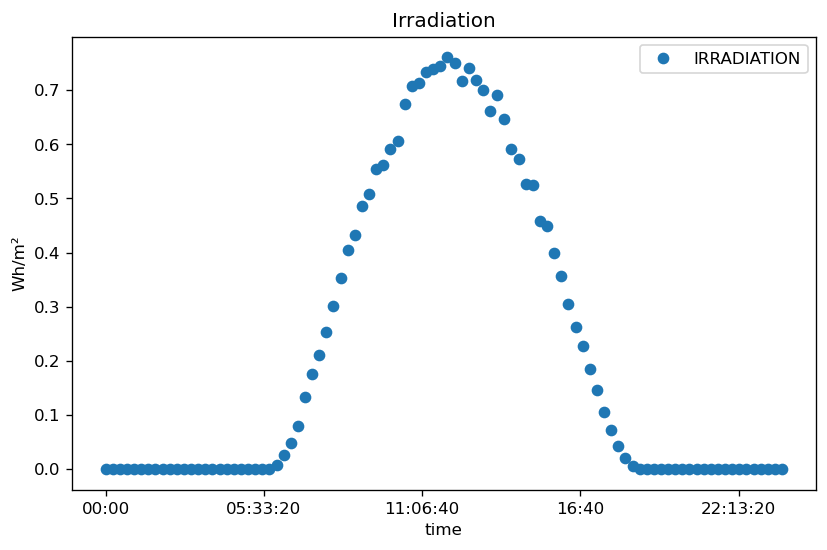

In [298]:
grp1_sens_1[['IRRADIATION']].plot(figsize = (8,5), style='o')
plt.title('Irradiation')
plt.ylabel('Wh/m²')

In [299]:
gen_1[gen_1['SOURCE_KEY'] == '4UPUqMRk7TRMgml'].drop(columns = ['SOURCE_KEY']).reset_index().set_index('DATE_TIME')


,index,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,


In [300]:
sens_1.drop(columns = ['SOURCE_KEY']).set_index('DATE_TIME')

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,time
DATE_TIME,,,,
2020-05-15 00:00:00,25.184316,22.857507,0.0,00:00:00
2020-05-15 00:15:00,25.084589,22.761668,0.0,00:15:00
2020-05-15 00:30:00,24.935753,22.592306,0.0,00:30:00
2020-05-15 00:45:00,24.846130,22.360852,0.0,00:45:00
2020-05-15 01:00:00,24.621525,22.165423,0.0,01:00:00
...,...,...,...,...
2020-06-17 22:45:00,22.150570,21.480377,0.0,22:45:00
2020-06-17 23:00:00,22.129816,21.389024,0.0,23:00:00
2020-06-17 23:15:00,22.008275,20.709211,0.0,23:15:00


In [307]:
comb_1 = pd.concat([gen_1[gen_1['SOURCE_KEY'] == '1BY6WEcLGh8j5v7'].drop(columns = ['SOURCE_KEY']).reset_index().set_index('DATE_TIME'),sens_1.drop(columns = ['SOURCE_KEY']).set_index('DATE_TIME')], axis = 1).dropna()
comb_1 = comb_1.drop(columns = ['TOTAL_YIELD','index'])
comb_1['time'] = comb_1.index.time
comb_1 = comb_1.groupby(by = 'time').mean()
#comb_1 = comb_1.sort_values(by = 'IRRADIATION', ascending = False)
#comb_1 = comb_1[comb_1['IRRADIATION'] != 0]

<AxesSubplot:>

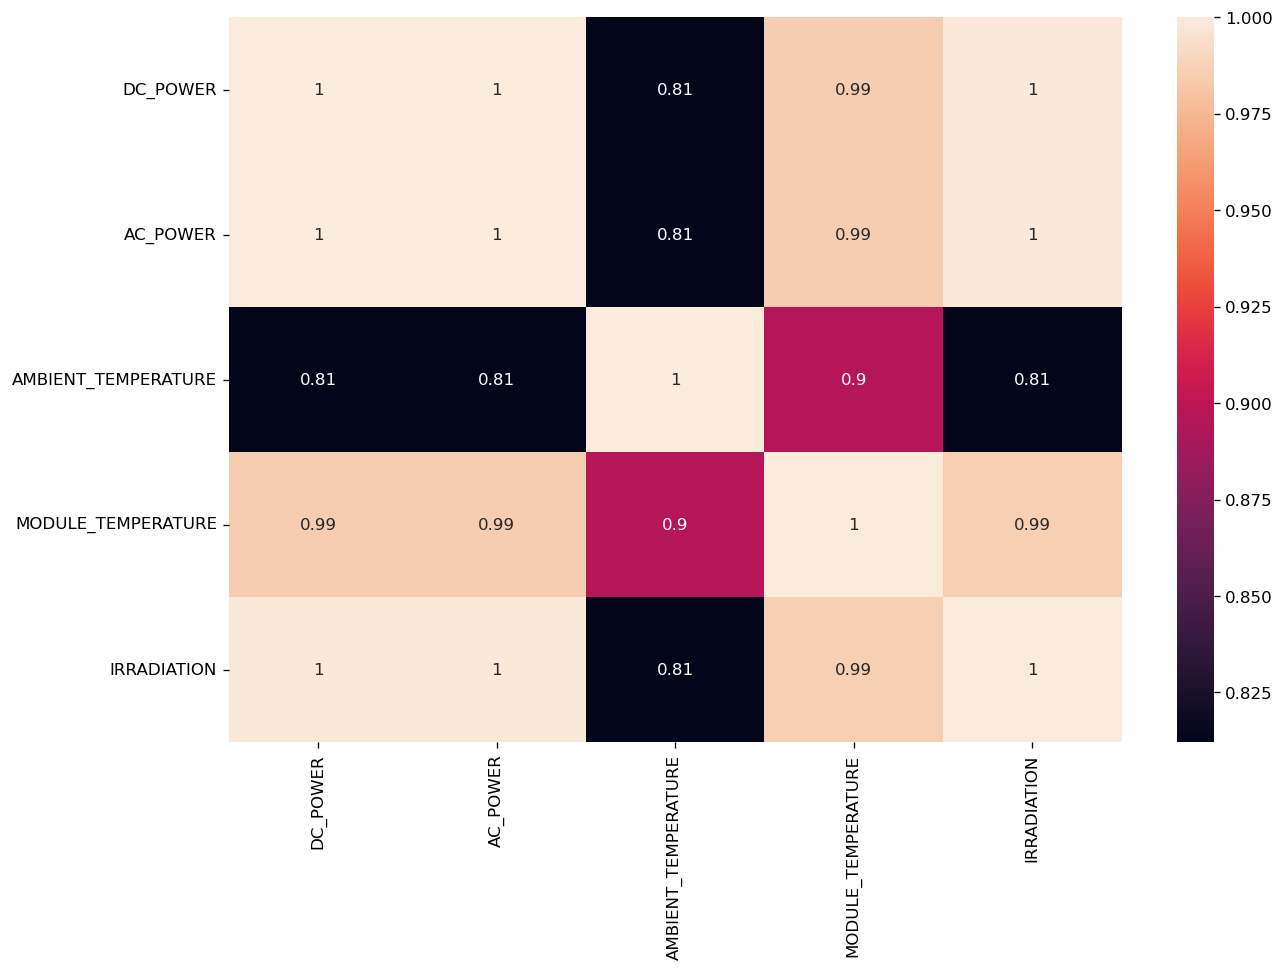

In [308]:
plt.figure(figsize = (12,8))
sns.heatmap(comb_1.drop(columns = ['DAILY_YIELD']).corr(), annot = True)


<Figure size 1440x960 with 0 Axes>

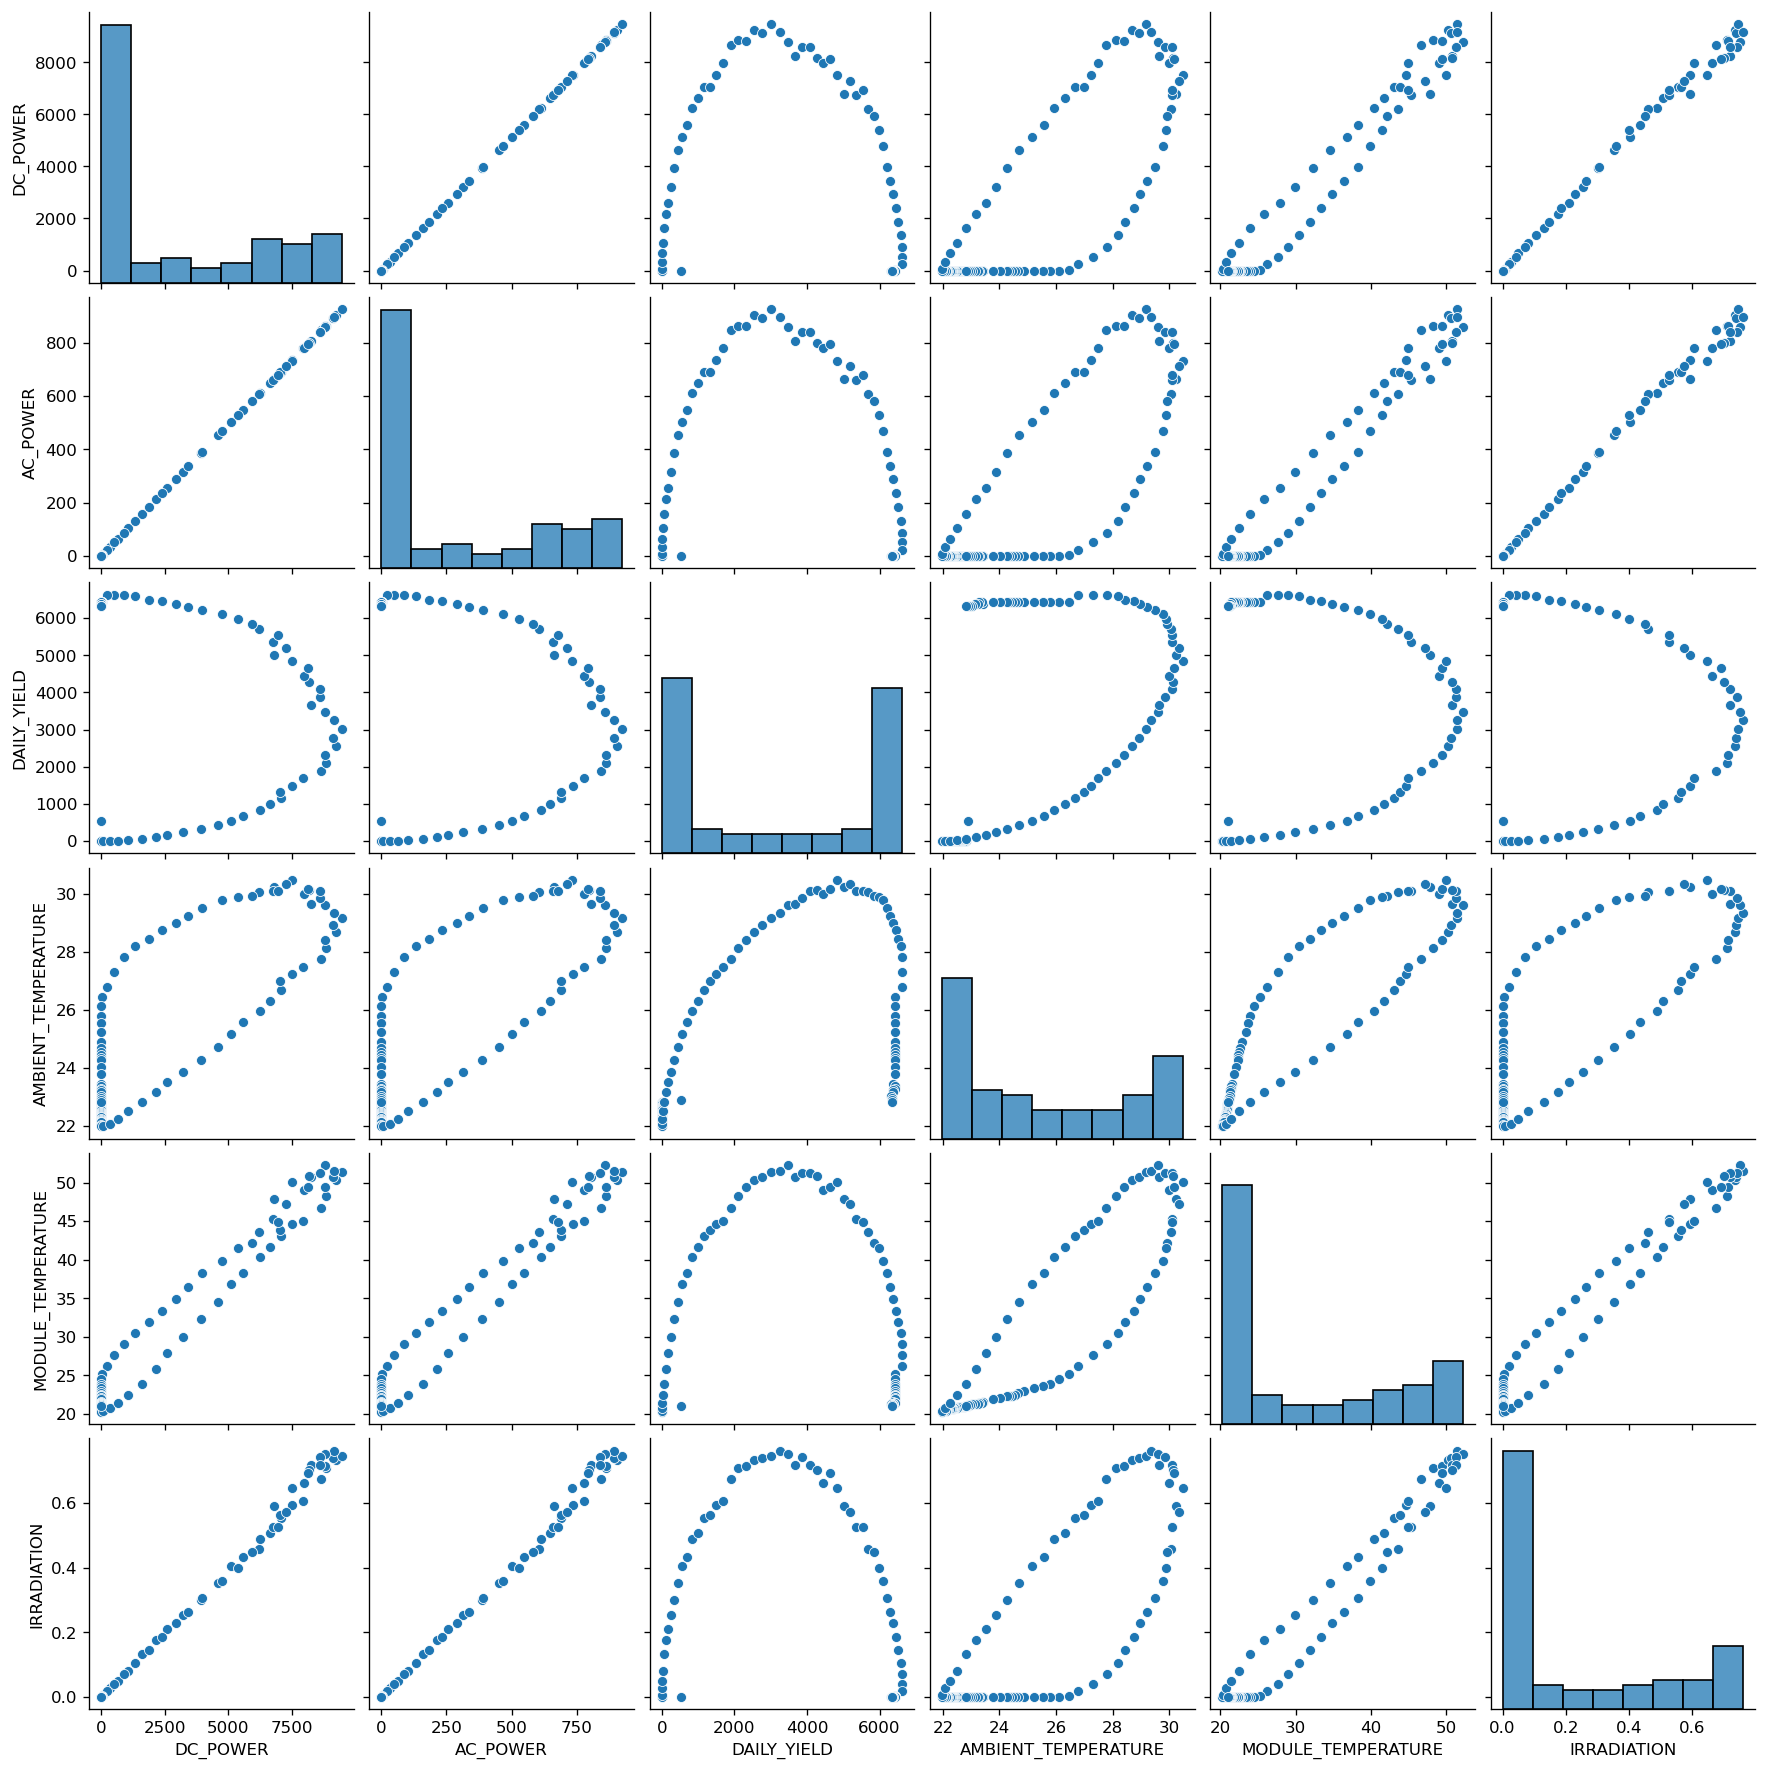

In [309]:
plt.figure(figsize = (12,8))
sns.pairplot(comb_1)

In [310]:
gen_1_ar = gen_1.copy()
gen_1_ar = gen_1.set_index('DATE_TIME')

gen_1_ar = gen_1_ar[gen_1_ar['SOURCE_KEY'] == '4UPUqMRk7TRMgml']

gen_1_ar = gen_1_ar['DAILY_YIELD']

In [311]:
gen_1_ar_lag1 = gen_1_ar - gen_1_ar.shift(1).dropna()
gen_1_ar_lag2 = gen_1_ar_lag1 - gen_1_ar_lag1.shift(1).dropna()
gen_1_ar_lag3 = gen_1_ar_lag2 - gen_1_ar_lag2.shift(1).dropna()

In [312]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(gen_1_ar_lag1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ValueError: sample size is too short to use selected regression component

In [ ]:
#D=1

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(gen_1_ar.values); axes[0, 0].set_title('Original Series')
plot_acf(gen_1_ar.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(gen_1_ar_lag1.values); axes[1, 0].set_title('1st Order Differencing')
plot_acf(gen_1_ar_lag1.values, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(gen_1_ar_lag2.values); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(gen_1_ar_lag2.values, ax=axes[2, 1])

plt.show()

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(gen_1_ar_lag2.values); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(gen_1_ar_lag2.values, ax=axes[1])

plt.show()

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(gen_1_ar_lag2.values); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(gen_1_ar_lag2.values, ax=axes[1])

plt.show()

In [ ]:
n_period = 96*3

In [313]:
pred_gen=gen_1.copy()
pred_gen=pred_gen.groupby('DATE_TIME').sum()
pred_gen=pred_gen['DAILY_YIELD'].reset_index()
pred_gen.set_index('DATE_TIME',inplace=True)
pred_gen.head()

,DAILY_YIELD
DATE_TIME,
2020-05-15 00:00:00,0.0
2020-05-15 00:15:00,0.0
2020-05-15 00:30:00,0.0
2020-05-15 00:45:00,0.0
2020-05-15 01:00:00,0.0


<AxesSubplot:xlabel='DATE_TIME'>

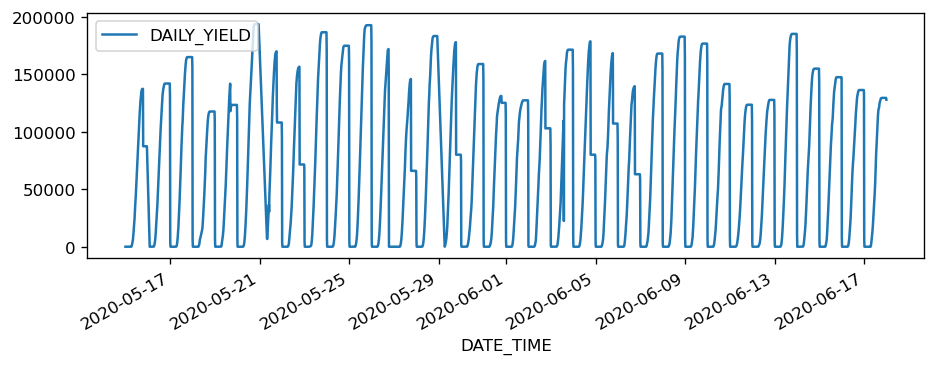

In [314]:
pred_gen.plot()

In [315]:
pred_gen=gen_1.copy()
pred_gen=pred_gen.groupby('DATE_TIME').sum()
pred_gen=pred_gen['DAILY_YIELD'][-n_period:].reset_index()
pred_gen.set_index('DATE_TIME',inplace=True)
pred_gen.head()

,DAILY_YIELD
DATE_TIME,
2020-06-14 23:30:00,155054.000000
2020-06-14 23:45:00,142682.392857
2020-06-15 00:00:00,5480.000000
2020-06-15 00:15:00,0.000000
2020-06-15 00:30:00,0.000000


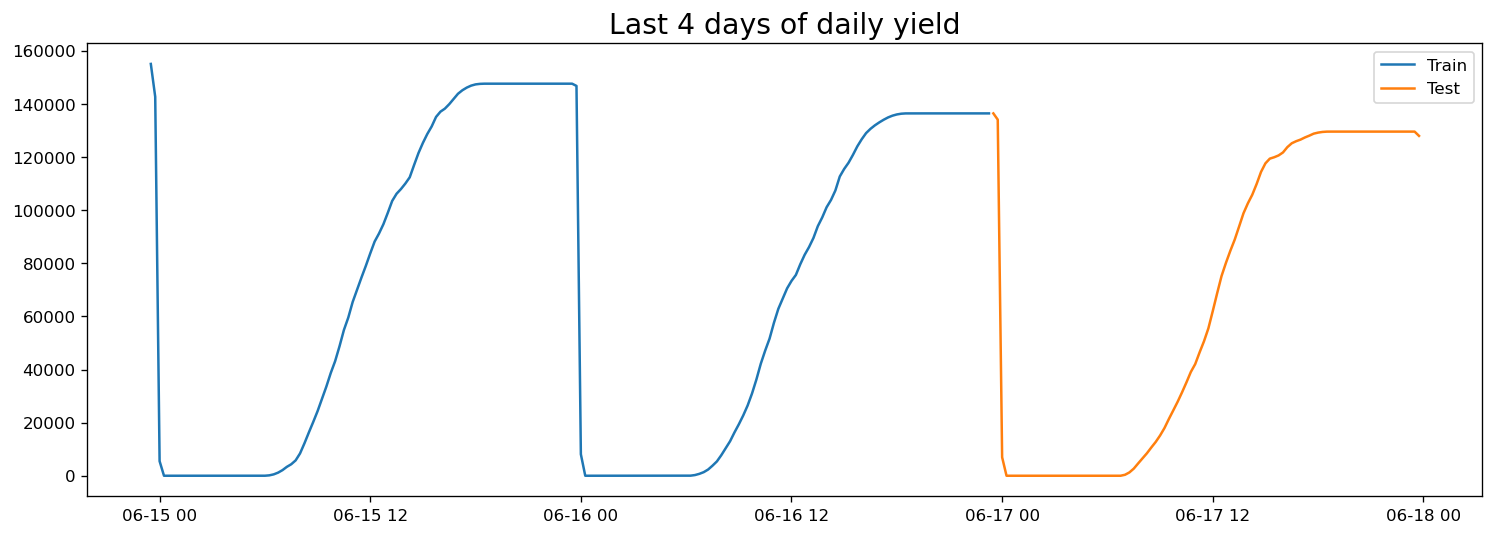

In [316]:
train=pred_gen[:96*2]
test=pred_gen[96*2:]
plt.figure(figsize=(15,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.title('Last 4 days of daily yield',fontsize=17)
plt.legend()
plt.show()

In [254]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima.arima import auto_arima


arima_model = auto_arima(train,
                         start_p=0,d=1,start_q=0,
                         max_p=4,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=20,n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=2030.449, Time=1.09 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=2031.288, Time=11.70 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=2031.138, Time=13.55 sec
 ARIMA(0,1,0)(1,1,0)[96]             : AIC=2029.616, Time=7.36 sec
 ARIMA(0,1,0)(1,1,1)[96]             : AIC=2031.604, Time=14.06 sec
 ARIMA(0,1,0)(0,1,1)[96]             : AIC=2029.605, Time=9.06 sec
 ARIMA(1,1,0)(0,1,1)[96]             : AIC=2031.299, Time=13.10 sec
 ARIMA(1,1,1)(0,1,1)[96]             : AIC=2029.692, Time=36.48 sec
 ARIMA(0,1,0)(0,1,1)[96] intercept   : AIC=2031.485, Time=14.10 sec

Best model:  ARIMA(0,1,0)(0,1,1)[96]          
Total fit time: 120.613 seconds


In [255]:
print(arima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  192
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 96)   Log Likelihood               -1012.803
Date:                              Tue, 18 Jul 2023   AIC                           2029.605
Time:                                      13:03:54   BIC                           2034.713
Sample:                                  06-15-2020   HQIC                          2031.669
                                       - 06-16-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L96      -0.2002      0.474     -0.422      0.673      -1.129       0.729
sigma2      1.073e+

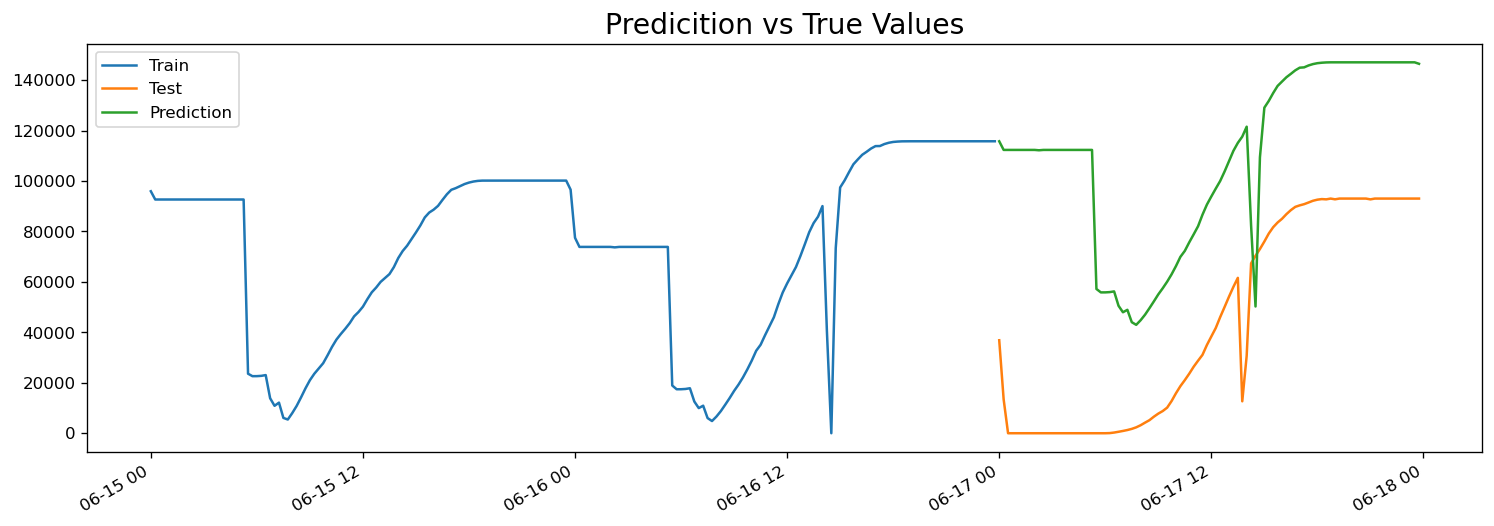

In [256]:
train=pred_gen[:96*2]
test=pred_gen[96*2:]
plt.figure(figsize=(15,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.title('Predicition vs True Values',fontsize=17)
arima_model.predict(96).plot(label = 'Prediction')
plt.legend()
plt.show()

In [257]:
arima_model.get_params

<bound method BaseEstimator.get_params of ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 96),
      suppress_warnings=True, with_intercept=False)>

In [258]:
pred_gen=gen_1.copy()
pred_gen=pred_gen.groupby('DATE_TIME').sum()
pred_gen=pred_gen['DAILY_YIELD'][-288:].reset_index()
pred_gen.set_index('DATE_TIME',inplace=True)
pred_gen.head()

,DAILY_YIELD
DATE_TIME,
2020-06-15 00:00:00,95945.6
2020-06-15 00:15:00,92668.0
2020-06-15 00:30:00,92668.0
2020-06-15 00:45:00,92668.0
2020-06-15 01:00:00,92668.0


In [259]:
model = ARIMA(pred_gen, order = (4, 1, 0), seasonal_order=(0, 1, 1, 96))

In [260]:
fitted = model.fit()  
print(fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        DAILY_YIELD   No. Observations:                  288
Model:             ARIMA(4, 1, 0)x(0, 1, [1], 96)   Log Likelihood               -2069.517
Date:                            Tue, 18 Jul 2023   AIC                           4151.033
Time:                                    13:04:57   BIC                           4170.547
Sample:                                06-15-2020   HQIC                          4158.937
                                     - 06-17-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1251      0.048      2.615      0.009       0.031       0.219
ar.L2         -0.2249      0.037   

In [261]:
pred_gen

,DAILY_YIELD
DATE_TIME,
2020-06-15 00:00:00,95945.6
2020-06-15 00:15:00,92668.0
2020-06-15 00:30:00,92668.0
2020-06-15 00:45:00,92668.0
2020-06-15 01:00:00,92668.0
...,...
2020-06-17 22:45:00,93040.0
2020-06-17 23:00:00,93040.0
2020-06-17 23:15:00,93040.0


In [262]:
timedelta(minutes = 15)

datetime.timedelta(seconds=900)

In [263]:
future_index = []
last_time = pred_gen.index[-1]
for i in range(192):
    last_time = last_time + timedelta(minutes = 15)
    future_index.append(last_time)

In [264]:
forecast = pd.DataFrame(fitted.forecast(192).values, index = future_index, columns = ['Forecast'])
forecast['Forecast'] = np.where(forecast<0, 0, forecast)

In [265]:
forecast

,Forecast
2020-06-18 00:00:00,66440.201558
2020-06-18 00:15:00,53713.513408
2020-06-18 00:30:00,47276.539613
2020-06-18 00:45:00,47330.106800
2020-06-18 01:00:00,47387.035152
...,...
2020-06-19 22:45:00,112490.336483
2020-06-19 23:00:00,112441.845375
2020-06-19 23:15:00,112592.797161
2020-06-19 23:30:00,112848.510565


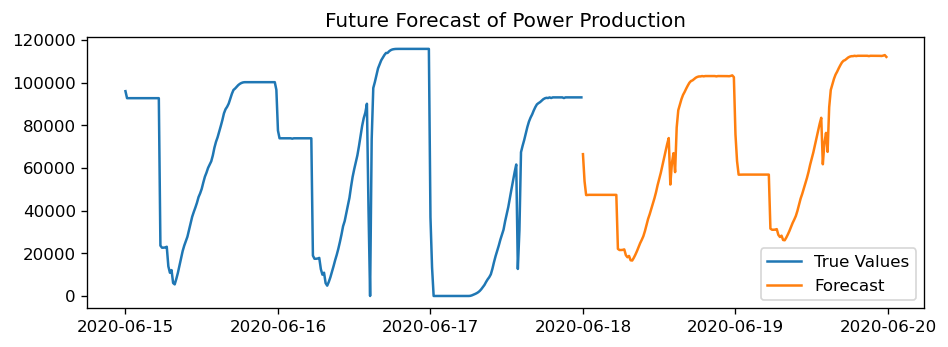

In [266]:
plt.plot(pred_gen, label = 'True Values')
plt.plot(forecast, label = 'Forecast')
plt.title('Future Forecast of Power Production')

plt.legend()
plt.show()